In [2]:
import numpy as np

class PCA():
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        # mean centering
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # covariance matrix
        cov_matrix = np.cov(X_centered.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # sort eigenvectors by eigenvalues
        eigenvectors = eigenvectors.T
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[sorted_indices]
        eigenvalues = eigenvalues[sorted_indices]

        # store first n_components eigenvectors
        self.components = eigenvectors[:self.n_components]

        # explained variance ratio
        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio_ = eigenvalues / total_variance

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

    def inverse_transform(self, X):
        return np.dot(X, self.components) + self.mean

    def reconstruct(self, X):
        return self.inverse_transform(self.transform(X))

    def explained_variance_ratio(self):
        return self.explained_variance_ratio_


Shape of X: (150, 4)
Shape of transformed X: (150, 2)


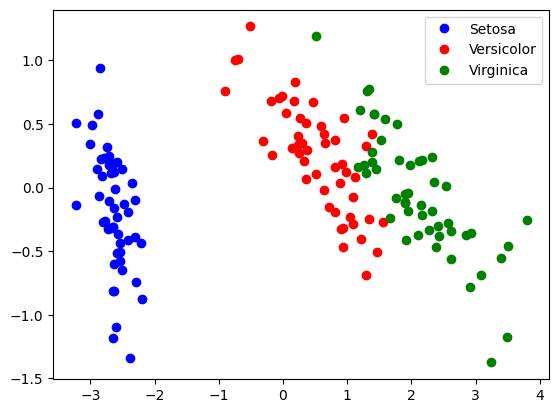

In [3]:
# testing PCA

from sklearn import datasets
import matplotlib.pyplot as plt

data = datasets.load_iris()
X = data.data
y = data.target

pca = PCA(
    n_components=2
)
X_projected = pca.fit_transform(X)

print(f"Shape of X: {X.shape}")
print(f"Shape of transformed X: {X_projected.shape}")

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]
plt.plot(x1[y==0], x2[y==0], 'bo', label='Setosa')
plt.plot(x1[y==1], x2[y==1], 'ro', label='Versicolor')
plt.plot(x1[y==2], x2[y==2], 'go', label='Virginica')
plt.legend()
plt.show()